In [371]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [477]:
df = pd.read_csv('creditcard.csv')

In [478]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [479]:
df.shape

(284807, 31)

In [480]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [481]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [482]:
df.duplicated().sum()

1081

In [487]:
df = df.drop_duplicates()

In [489]:
df.duplicated().sum()

0

In [491]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

# Exploratory Data Analysis

<Axes: xlabel='Amount', ylabel='Count'>

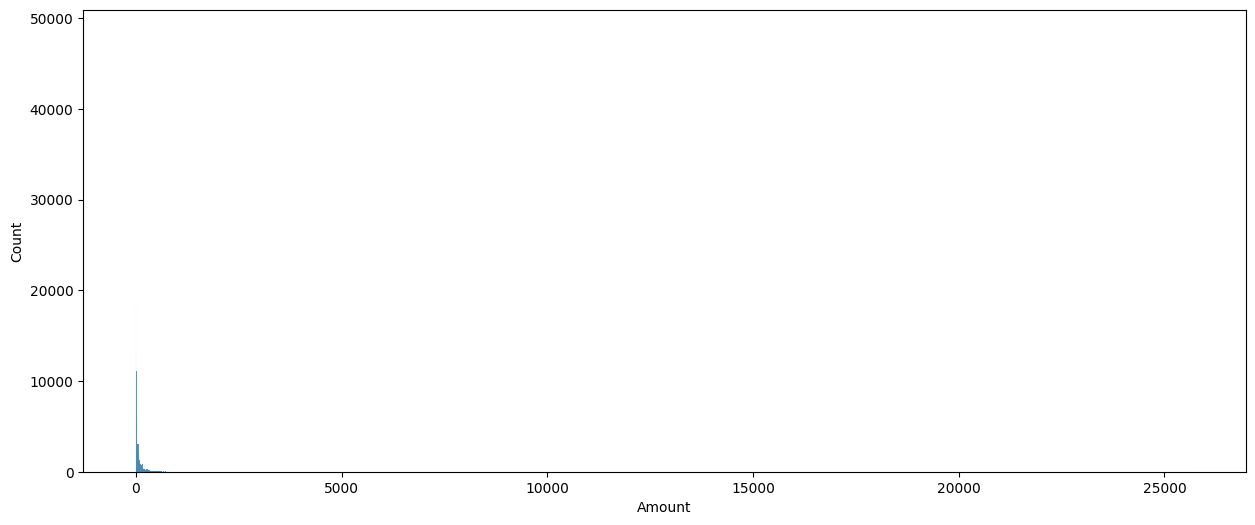

In [492]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='Amount')

<Axes: xlabel='Amount'>

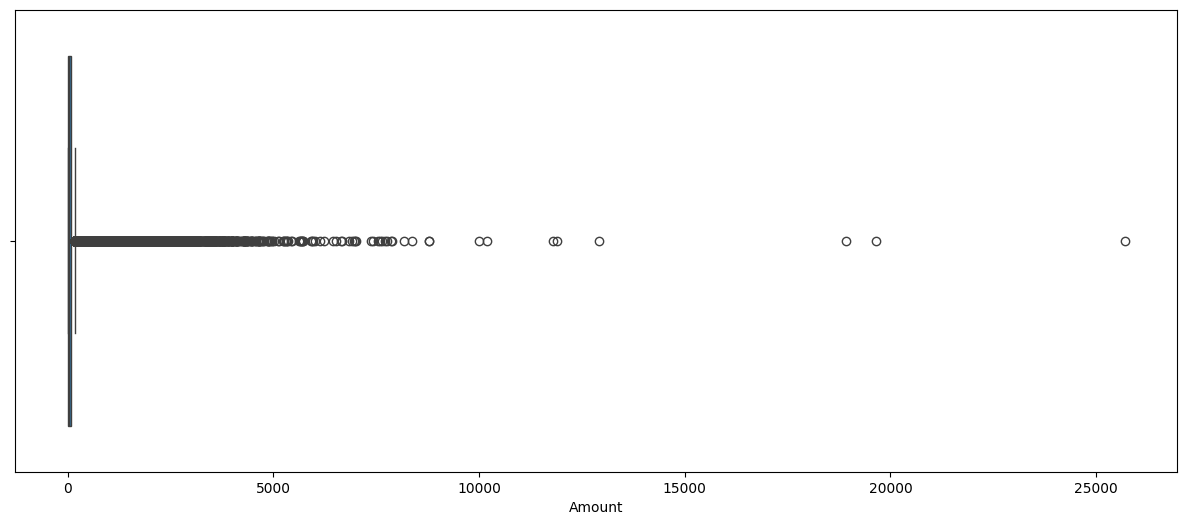

In [494]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='Amount')

<Axes: xlabel='Time', ylabel='Count'>

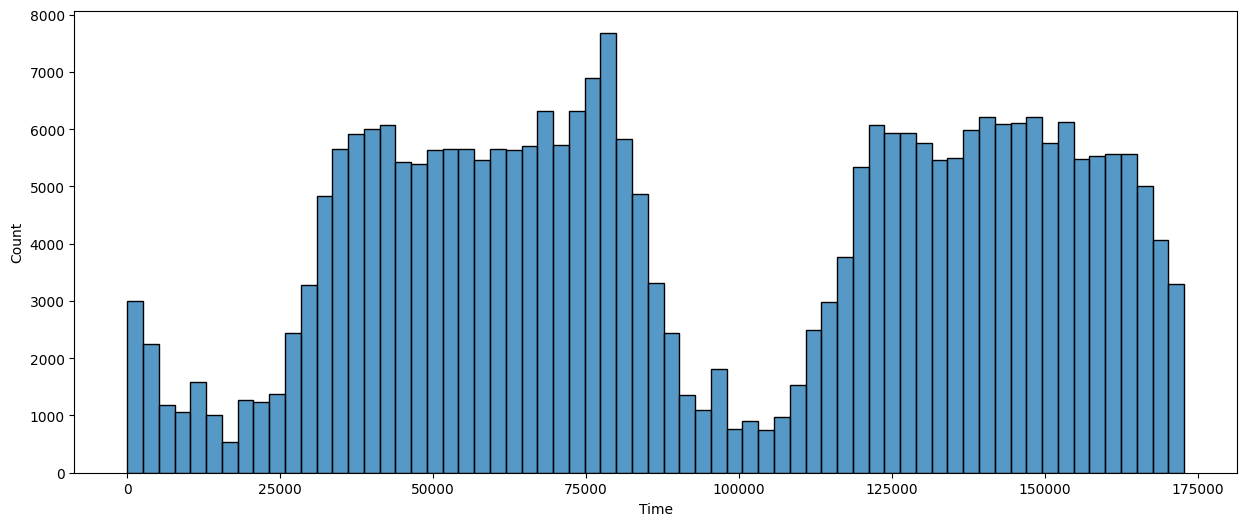

In [797]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='Time')

In [495]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

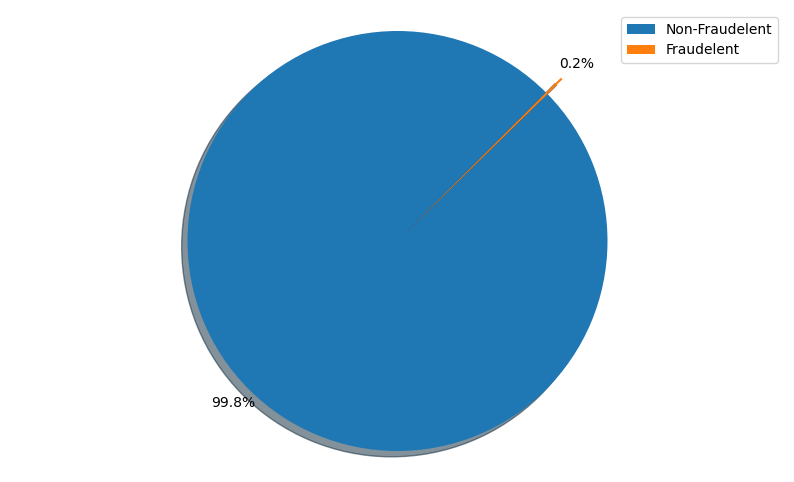

In [863]:
plt.figure(figsize=(10,6))
plt.pie(x=df['Class'].value_counts(), startangle=45, autopct='%.1f%%', pctdistance=1.1, explode=[0,0.1], shadow=True)
plt.axis('equal')
plt.legend(labels=['Non-Fraudelent','Fraudelent'],loc='best')


<Axes: >

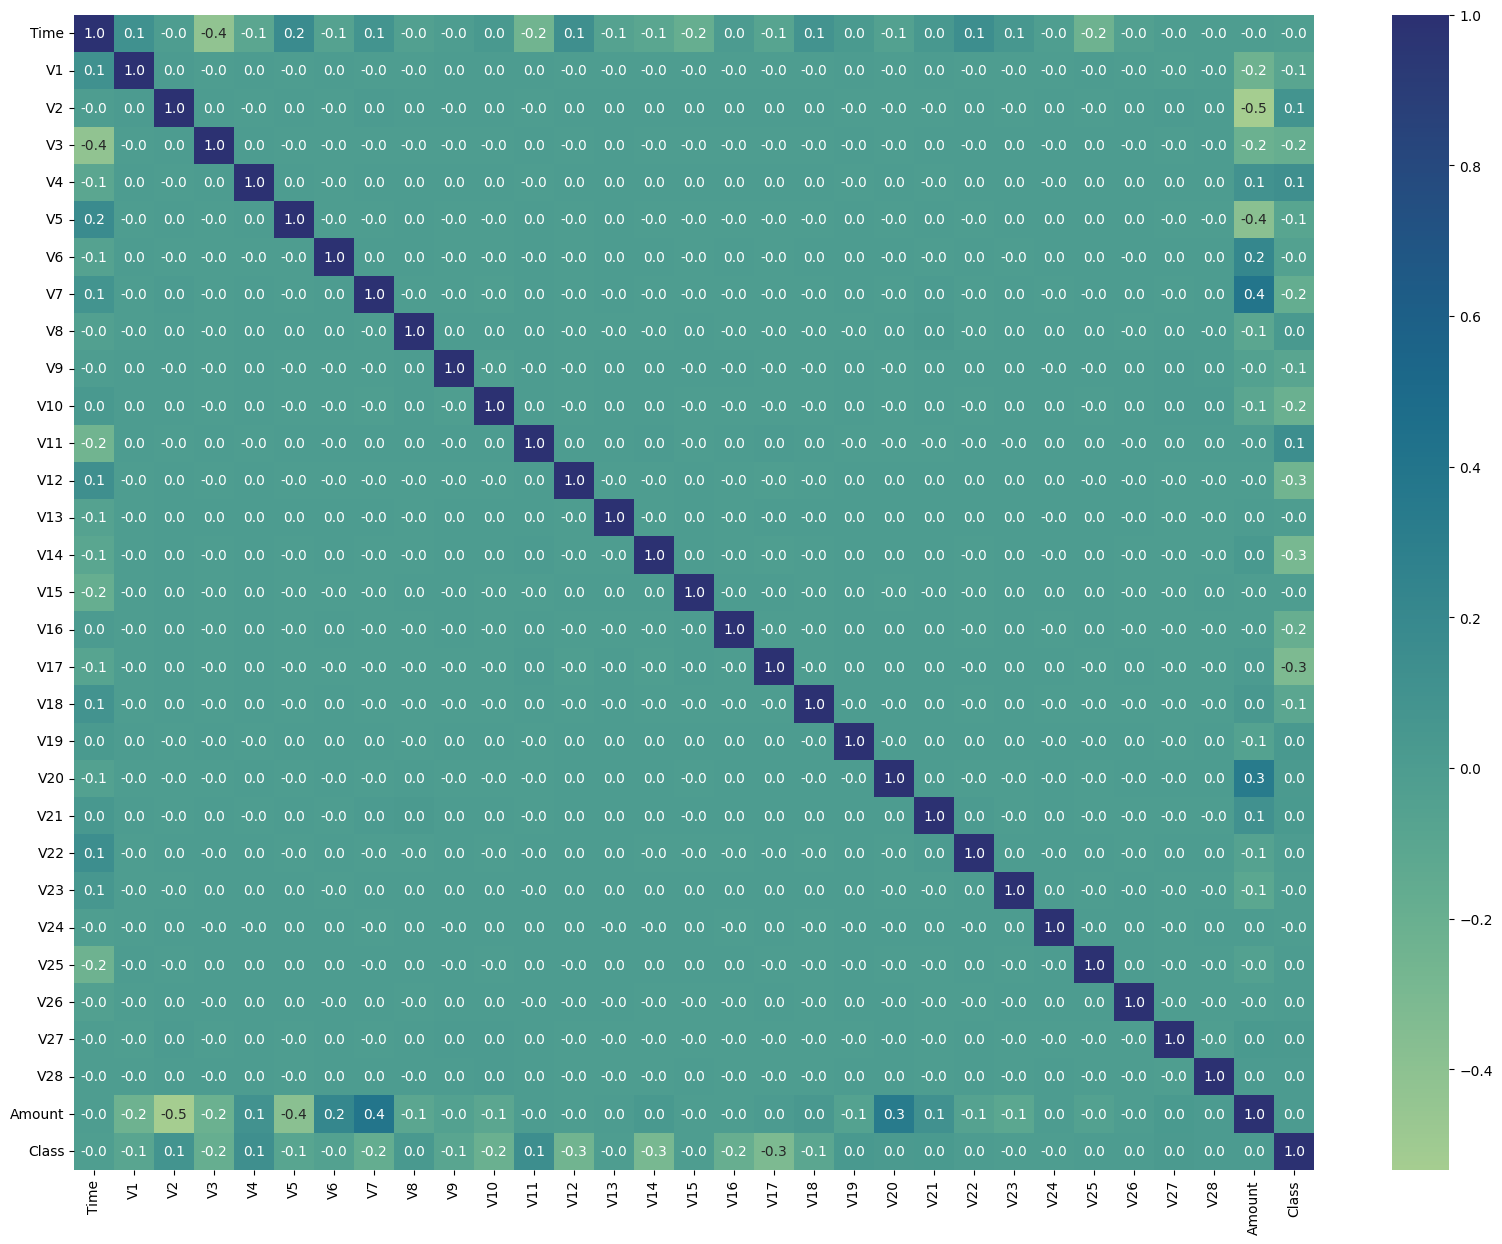

In [865]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='crest')

In [598]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [501]:
X = df.drop(columns=['Class'])
y = df['Class']

In [502]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [503]:
scaler = StandardScaler()
#Drop time
scaled_train = scaler.fit_transform(X_train[['Time', 'Amount']])
scaled_df = pd.DataFrame(scaled_train, columns=['Time', 'Amount'], index=X_train.index)
X_train_remaining = X_train.drop(['Time', 'Amount'], axis=1)
X_train_scaled = pd.concat([scaled_df, X_train_remaining], axis=1)

In [504]:
scaled_test = scaler.transform(X_test[['Time', 'Amount']])
scaled_df = pd.DataFrame(scaled_test, columns=['Time', 'Amount'], index=X_test.index)
X_test_remaining = X_test.drop(['Time', 'Amount'], axis=1)
X_test_scaled = pd.concat([scaled_df, X_test_remaining], axis=1)

In [527]:
X_test_scaled.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
169815,0.527448,-0.324415,-0.251986,0.577250,-0.905612,-0.673640,1.568707,-0.426995,0.840070,-0.053526,...,0.191071,-0.055071,-0.425520,-1.025204,0.349001,-0.441676,-0.223314,0.178979,0.138055,0.027781
27603,-1.268386,-0.171088,1.465262,-1.001141,0.561204,-1.408399,-1.449076,-0.664901,-0.948446,-0.239268,...,-0.123638,-0.157037,-0.356857,-0.681777,0.089917,0.018911,0.213973,-0.396199,0.045330,0.034921
229787,1.078866,-0.353056,-0.940469,0.982785,0.825928,-1.099412,1.464196,-0.603169,1.082077,-0.001681,...,-0.274506,0.048104,-0.272204,-0.917577,-0.285301,0.689790,0.593545,0.178436,-0.060327,0.063948
283441,1.617056,-0.353580,-1.094495,2.306502,-0.166743,2.755604,1.707679,-0.103545,1.407148,0.047685,...,-1.081656,-0.214581,0.300212,0.524186,-0.428981,0.633567,0.502802,0.170599,-0.481726,0.041166
172440,0.553294,-0.308239,1.998499,-0.090994,-1.517181,0.285991,0.318210,-0.141764,-0.273862,0.069320,...,0.126517,-0.136485,-0.088281,-0.176456,0.197600,0.209894,-0.236291,0.377119,-0.047248,-0.036824


## Logistic Regression

In [529]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [531]:
y_pred_lr = lr.predict(X_test_scaled)

In [533]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.87      0.64      0.74        95

    accuracy                           1.00     56746
   macro avg       0.94      0.82      0.87     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
#ROC AUC score

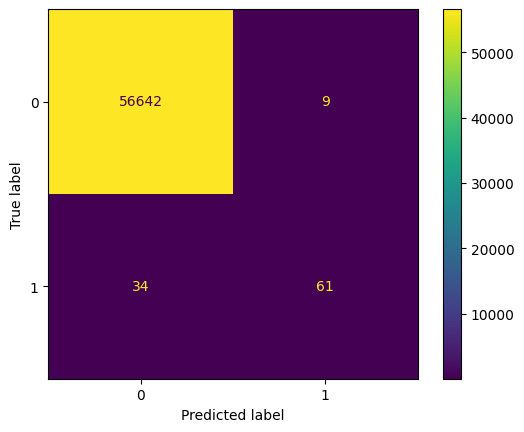

In [551]:
lr_cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lr), display_labels=['0','1'])

lr_cm.plot()

## KNN

In [535]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [537]:
y_pred_knn = knn.predict(X_test_scaled)

In [538]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.95      0.80      0.87        95

    accuracy                           1.00     56746
   macro avg       0.97      0.90      0.93     56746
weighted avg       1.00      1.00      1.00     56746



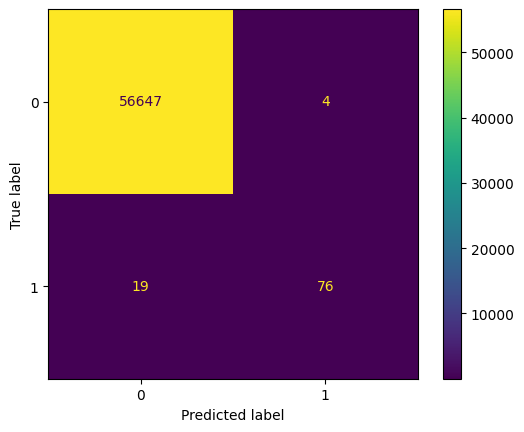

In [553]:
knn_cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_knn), display_labels=['0','1'])

knn_cm.plot()

## Random Forest

In [559]:
rf = RandomForestClassifier(n_estimators = 10, max_depth=50) #30 seconds computation time
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=50, n_estimators=10)

In [560]:
y_pred_rf = rf.predict(X_test_scaled)

In [561]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.80      0.87        95

    accuracy                           1.00     56746
   macro avg       0.98      0.90      0.94     56746
weighted avg       1.00      1.00      1.00     56746



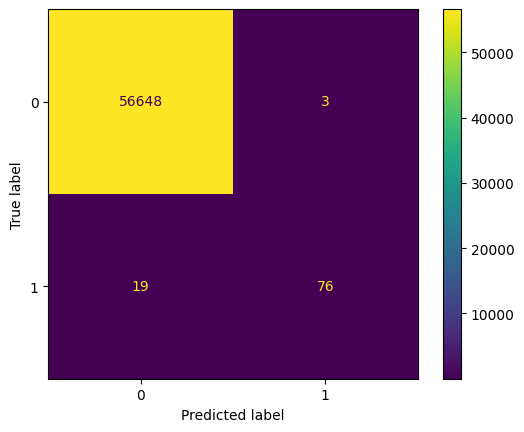

In [562]:
rf_cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf), display_labels=['0','1'])

rf_cm.plot()

## XGBoost

In [571]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [572]:
y_pred_xgb = xgb.predict(X_test_scaled)

In [573]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.78      0.84        95

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746



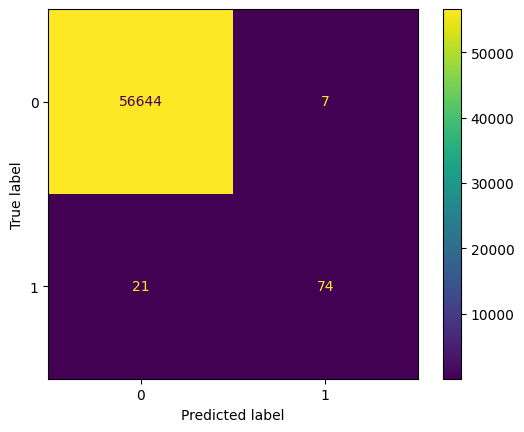

In [577]:
xgb_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb), display_labels=['0','1'])

xgb_cm.plot()

## SVM

In [579]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC()

In [580]:
y_pred_svm = svm.predict(X_test_scaled)

In [581]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.95      0.77      0.85        95

    accuracy                           1.00     56746
   macro avg       0.97      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746



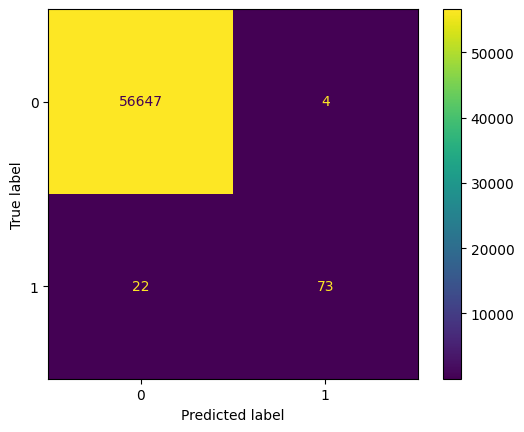

In [582]:
svm_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm), display_labels=['0','1'])

svm_cm.plot()

# Hypertuning with RandomisedSearchCV

## Random Forest Hypertuning

In [664]:
rf = RandomForestClassifier()

In [666]:
rf_param_grid = {
    'n_estimators': [10, 20, 30], 
    'max_depth': [None, 5, 10, 15],  
    'class_weight': [None, 'balanced'] 
}

In [668]:
rf_cv = RandomizedSearchCV(rf, param_distributions = rf_param_grid, cv=5, scoring='recall', n_iter=10, verbose=2, n_jobs=-1) #10 minutes computation time
rf_cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'max_depth': [None, 5, 10, 15],
                                        'n_estimators': [10, 20, 30]},
                   scoring='recall', verbose=2)

In [669]:
y_pred_rf_cv = rf_cv.predict(X_test_scaled)

In [670]:
print(classification_report(y_test, y_pred_rf_cv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.30      0.86      0.44        95

    accuracy                           1.00     56746
   macro avg       0.65      0.93      0.72     56746
weighted avg       1.00      1.00      1.00     56746



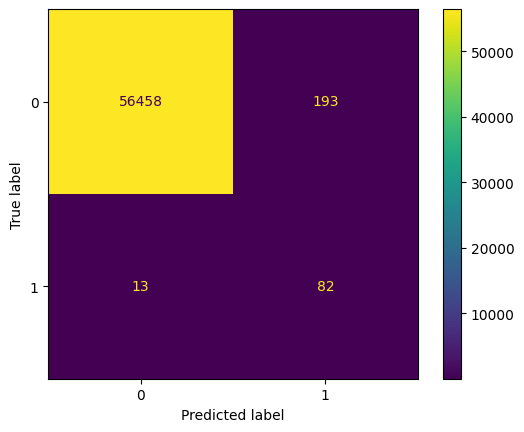

In [671]:
rf_cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf_cv), display_labels=['0','1'])

rf_cm.plot()

## XGBoost Hypertuning

In [754]:
xgb = XGBClassifier()

In [780]:
xgb_param_grid = {
    'n_estimators': [10, 20, 30, 50, 70, 90], 
    'max_depth': [None, 5, 10, 15],
    'learning_rate': [0.03, 0.05, 0.06],
    'gamma': [0, 0.1, 0.2]
}

In [782]:
xgb_cv = RandomizedSearchCV(xgb, param_distributions = xgb_param_grid, cv=5, scoring='recall', n_iter=100, verbose=2, n_jobs=-1) #2 minutes computation time
xgb_cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.03, 0.05, 0.06],
                                        'max_depth': [None, 5, 10, 15],
                                        'n_estimators': [10, 20, 30, 50, 70,
                                                         90]},
                   scoring='recall', verbose=2)

In [783]:
y_pred_xgb_cv = xgb_cv.predict(X_test_scaled)

In [784]:
print(classification_report(y_test, y_pred_xgb_cv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.95      0.82      0.88        95

    accuracy                           1.00     56746
   macro avg       0.98      0.91      0.94     56746
weighted avg       1.00      1.00      1.00     56746



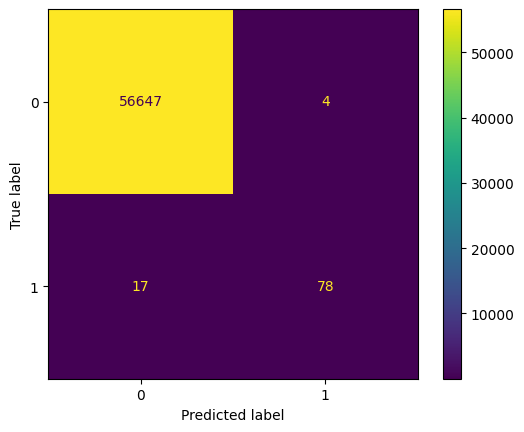

In [785]:
xgb_cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_xgb_cv), display_labels=['0','1'])

xgb_cm.plot()